# 실루엣 분석 - 군집 평가

- Iris data로 군집화 평가

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

iris=load_iris()
iris_std=StandardScaler().fit_transform(iris.data)
pca=PCA(n_components=2)
iris_pca=pca.fit_transform(iris_std)

In [3]:
kmeans=KMeans(n_clusters=3,random_state=2022)
kmeans.fit(iris_std)

KMeans(n_clusters=3, random_state=2022)

In [4]:
df=pd.DataFrame(iris.data,columns=['sl','sw','pl','pw'])
df['target']=iris.target
df['cluster']=kmeans.labels_
df.head()

,sl,sw,pl,pw,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


- 실루엣 계수

In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil_samples=silhouette_samples(iris_std,kmeans.labels_)
df['실루엣 계수']=sil_samples
df.head()

,sl,sw,pl,pw,target,cluster,실루엣 계수
0,5.1,3.5,1.4,0.2,0,1,0.734195
1,4.9,3.0,1.4,0.2,0,1,0.568274
2,4.7,3.2,1.3,0.2,0,1,0.677547
3,4.6,3.1,1.5,0.2,0,1,0.620502
4,5.0,3.6,1.4,0.2,0,1,0.728474


- 실루엣 스코어 = 실루엣 계수의 평균

In [7]:
silhouette_score(iris_std,kmeans.labels_)

0.45994823920518635

In [8]:
df['실루엣 계수'].mean()

0.45994823920518646

In [9]:
df.groupby('cluster')['실루엣 계수'].mean()
#1은 잘 나눠졌으나 0/2는 잘 안 나눠졌다. 

cluster
0    0.393377
1    0.636316
2    0.347392
Name: 실루엣 계수, dtype: float64

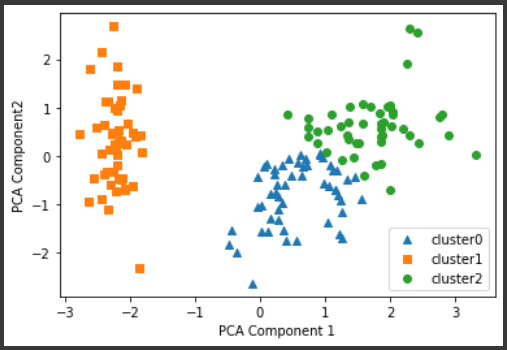

- 실루엣 계수 시각화

In [10]:
from google.colab import files
up =files.upload()

Saving visualize.py to visualize.py


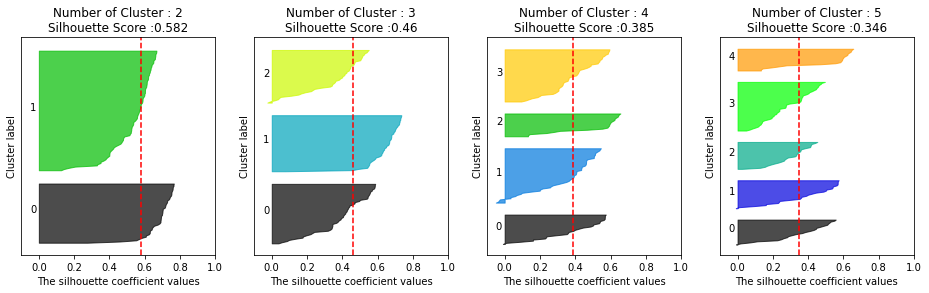

In [12]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5],iris_std)